In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from PIL import Image

from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from sklearn.utils import class_weight

from tensorflow.keras.losses import CategoricalCrossentropy,SparseCategoricalCrossentropy
from tensorflow.keras import layers
from tensorflow.keras import activations
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras import callbacks

from keras import backend as K

from imutils import paths
from keras.preprocessing.image import img_to_array
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from keras.utils import np_utils

import cv2

In [ ]:
# load in image
# rescale to 48*48
# generate more data with shift rotate grey scale?
# d = Image.open('.././data/images/train/angry/0.jpg')

In [ ]:
# Model visual

In [ ]:
import os
import imutils
import glob

In [ ]:
path= '.././data/data_split_2'
data = []
labels = []

In [ ]:
for imagePath in sorted(list(imutils.paths.list_images(path))):
    image = cv2.imread(imagePath)
    # image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # image = imutils.resize(image, width=28)
    image = img_to_array(image)
    data.append(image)  
    # extract the class label from the image path and update the
    # labels list
    label = imagePath.split(os.path.sep)[-2]
    # label = "smiling" if label == "positives" else "not_smiling"
    labels.append(label)

In [ ]:
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)
# convert the labels from integers to vectors
(trainX, testX, trainY, testY) = train_test_split(data,labels, test_size=0.20, stratify=labels, random_state=42)

le = LabelBinarizer()
trainY = le.fit_transform(trainY)
testY = le.transform(testY)
class_count = np.unique(labels).__len__()


In [ ]:

# 2023-12-10
img_generator = ImageDataGenerator(
    # rotation_range=10,   
    # width_shift_range=0.2,
    # height_shift_range=0.2,
    # shear_range=0.2,
    # zoom_range=0.1,
    # horizontal_flip=True,
    fill_mode='nearest'
    )

# img_generator_test = ImageDataGenerator(
#     rescale=1/255
#     )


In [69]:
class_count

6

In [ ]:
# model

def experiment(width,height,depth):

    inputShape = (height, width, depth)

    if K.image_data_format() == "channels_first":
        inputShape = (depth, height, width)

    # epoch 20
    # train loss 0.6804712414741516
    # val_loss loss 0.7954990863800049
    # categorical_accuracy acc 0.7605320811271667
    # val_categorical_accuracy acc 0.7033051252365112

    # epoch 20
    # train loss 0.3060787618160248
    # val_loss loss 1.0181041955947876
    # categorical_accuracy acc 0.893408477306366
    # val_categorical_accuracy acc 0.7102228999137878

    model = keras.Sequential()
    model.add(layers.Conv2D(32,(3,3),padding="same",activation='relu',kernel_initializer='he_normal',input_shape=inputShape))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(32,(3,3),padding="same",activation='relu',kernel_initializer='he_normal'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2,2)))

    model.add(layers.Conv2D(64,(3,3),padding="same",activation='relu',kernel_initializer='he_normal'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64,(3,3),padding="same",activation='relu',kernel_initializer='he_normal'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2,2)))

    model.add(layers.Conv2D(128,(3,3),padding="same",activation='relu',kernel_initializer='he_normal'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(128,(3,3),padding="same",activation='relu',kernel_initializer='he_normal'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2,2)))

    model.add(layers.Conv2D(256,(3,3),padding="same",activation='relu',kernel_initializer='he_normal'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(256,(3,3),padding="same",activation='relu',kernel_initializer='he_normal'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2,2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(256,activation='relu',kernel_initializer='he_normal'))    
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))

    model.add(layers.Dense(256,activation='relu',kernel_initializer='he_normal'))    
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))


    model.add(layers.Dense(class_count,activation='softmax'))
    return model 


def experiment2(height, width, depth):
    # epoch 20
    # train loss 0.6804712414741516
    # val_loss loss 0.7954990863800049
    # categorical_accuracy acc 0.7605320811271667
    # val_categorical_accuracy acc 0.7033051252365112

    # epoch 20
    # train loss 0.3060787618160248
    # val_loss loss 1.0181041955947876
    # categorical_accuracy acc 0.893408477306366
    # val_categorical_accuracy acc 0.7102228999137878

    # epoch 50
    # train loss 0.49535128474235535
    # val_loss loss 0.8382148742675781
    # categorical_accuracy acc 0.8238208293914795
    # val_categorical_accuracy acc 0.7104791402816772

    inputShape = (height, width, depth)

    if K.image_data_format() == "channels_first":
        inputShape = (depth, height, width)



    model = keras.Sequential()
    model.add(layers.Conv2D(32,(3,3),padding="same",activation='relu',kernel_initializer='he_normal',input_shape=inputShape))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(32,(3,3),padding="same",activation='relu',kernel_initializer='he_normal'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2,2)))

    model.add(layers.Conv2D(64,(3,3),padding="same",activation='relu',kernel_initializer='he_normal'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64,(3,3),padding="same",activation='relu',kernel_initializer='he_normal'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2,2)))

    model.add(layers.Conv2D(128,(3,3),padding="same",activation='relu',kernel_initializer='he_normal'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(128,(3,3),padding="same",activation='relu',kernel_initializer='he_normal'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2,2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(128,activation='relu',kernel_initializer='he_normal'))    
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.6))

    model.add(layers.Flatten())
    model.add(layers.Dense(128,activation='relu',kernel_initializer='he_normal'))    
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.6))



    model.add(layers.Dense(class_count,activation='softmax'))
    return model 



def experiment3(height, width, depth):

    inputShape = (height, width, depth)

    if K.image_data_format() == "channels_first":
        inputShape = (depth, height, width)


    model = keras.Sequential()
    model.add(layers.Conv2D(32,(2,2),padding="same",kernel_initializer='he_normal',input_shape=inputShape))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Conv2D(32,(2,2),padding="same",kernel_initializer='he_normal'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))

    model.add(layers.Conv2D(64,(2,2),padding="same",kernel_initializer='he_normal'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Conv2D(64,(2,2),padding="same",kernel_initializer='he_normal'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Activation('relu'))

    model.add(layers.Conv2D(128,(3,3),padding="same",kernel_initializer='he_normal'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Conv2D(128,(3,3),padding="same",kernel_initializer='he_normal'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Activation('relu'))

    model.add(layers.Flatten())
    model.add(layers.Dense(128,kernel_initializer='he_normal'))    
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Dropout(0.6))

    model.add(layers.Flatten())
    model.add(layers.Dense(128,kernel_initializer='he_normal'))    
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Dropout(0.6))
    
    model.add(layers.Dense(class_count))
    model.add(layers.Activation('softmax'))
    return model 

In [ ]:
inputShape = (height, width, depth)

In [70]:
model.save_weights('d/weight2.h5')

In [63]:
K.image_data_format()

'channels_last'

In [ ]:
import matplotlib.pyplot as  plt
# plt.use("ggplot")
def plot_data(H):
    epochs = H.epoch.__len__()
    plt.figure()
    plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
    plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss")
    plt.plot(np.arange(0, epochs), H.history["categorical_accuracy"], label="train_acc")
    plt.plot(np.arange(0, epochs), H.history["val_categorical_accuracy"], label="val_acc")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss/Accuracy")
    plt.legend()

In [ ]:

epochs = 50

# opt = optimizers.SGD(learning_rate=0.01,momentum=0.5,nesterov=True,decay=0.01/epochs)
opt = optimizers.Adam(learning_rate=0.01)
loss = keras.losses.CategoricalCrossentropy()
metric = keras.metrics.CategoricalAccuracy()

# save multiple model
# fname = os.path.sep.join([".././model/checkpoint","weights-{epoch:03d}-{val_loss:.4f}.hdf5"])
# fname = ".././model/checkpoint/checkpoint.weights.h5"

# checkpoint = callbacks.ModelCheckpoint(fname, monitor="val_loss", mode="min",save_best_only=True, verbose=1)
# earlystop = callbacks.EarlyStopping(monitor="val_loss",patience=5,verbose=1,mode="auto")
# callback = [checkpoint,earlystop]
# callbacks = [earlystop]
# model = experiment()
model = experiment2()
model.compile(optimizer=opt,loss=loss,metrics=[metric])


In [ ]:
K.set_value(model.optimizer.learning_rate, 0.001)
model.optimizer.learning_rate

In [58]:
checkpoint = callbacks.ModelCheckpoint('testsave.hdf5', monitor="val_loss", mode="min",save_best_only=True, verbose=1)
callback = [checkpoint]

In [59]:
callback

In [62]:
model.input

<KerasTensor: shape=(None, None, None, None) dtype=float32 (created by layer 'conv2d_18_input')>

In [60]:
H = model.fit(img_generator.flow(x=trainX,y= trainY,batch_size=256), 
    validation_data=(testX, testY),
    callbacks=callback,
    epochs=epochs
)


Epoch 1/50
183/183 [==============================] - ETA: 0s - loss: 0.1834 - categorical_accuracy: 0.9408
Epoch 1: val_loss improved from inf to 1.30772, saving model to testsave.hdf5
183/183 [==============================] - 84s 459ms/step - loss: 0.1834 - categorical_accuracy: 0.9408 - val_loss: 1.3077 - val_categorical_accuracy: 0.7068
Epoch 2/50
  6/183 [..............................] - ETA: 1:13 - loss: 0.1610 - categorical_accuracy: 0.9557

KeyboardInterrupt: 

              precision    recall  f1-score   support

       angry       0.65      0.62      0.64      1502
        fear       0.48      0.45      0.47      1075
       happy       0.89      0.87      0.88      3459
     neutral       0.66      0.68      0.67      2371
         sad       0.59      0.62      0.61      2184
    surprise       0.78      0.77      0.77      1118

    accuracy                           0.71     11709
   macro avg       0.67      0.67      0.67     11709
weighted avg       0.71      0.71      0.71     11709



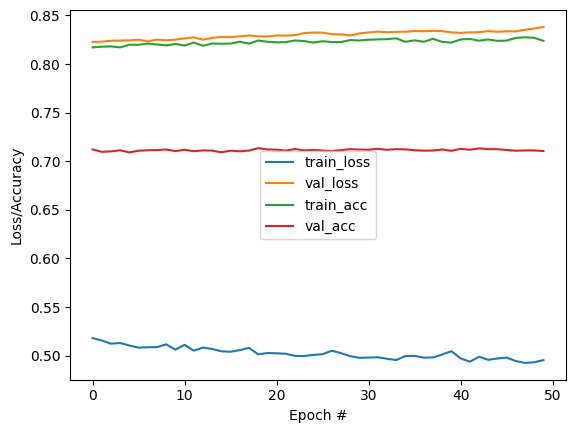

In [71]:
predictions = model.predict(testX, batch_size=256)

print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1),target_names=le.classes_))

plot_data(H)

In [49]:
loss = H.history["loss"][-1]
val_loss = H.history["val_loss"][-1]
categorical_accuracy = H.history["categorical_accuracy"][-1]
val_categorical_accuracy = H.history["val_categorical_accuracy"][-1]
epoch = H.epoch.__len__()
print(f'epoch {epoch}')
print(f'train loss {loss}')
print(f'val_loss loss {val_loss}')
print(f'categorical_accuracy acc {categorical_accuracy}')
print(f'val_categorical_accuracy acc {val_categorical_accuracy}')

epoch 50
train loss 0.49535128474235535
val_loss loss 0.8382148742675781
categorical_accuracy acc 0.8238208293914795
val_categorical_accuracy acc 0.7104791402816772


In [56]:
keras.models.save_model(model,'test.hdf5')

In [53]:
model

In [54]:
model.save('model.keras')

In [55]:
model.save('model.hdf5')

In [ ]:
import pickle


# Save the model using pickle
with open('../model/keras/bestmodel-2.pkl', 'wb') as file:
    pickle.dump(model, file)
